In [28]:
# Copy this file and then run an experiment
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
import pickle  # Use this to save results so we don't need to rerun experiments
rf = importlib.import_module("random-forests")
misclass_rate = rf.random_forests.misclassification_rate
cmap = {"iris": "blue", "wine": "purple", "heart": "red", "titanic": "green", "mushroom": "orange"}
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def m_sd(results):
    ret = {}
    for k in results.keys():
        ret[k] = np.apply_along_axis(comp_mean_sd, 1, results[k])
    return ret

In [2]:
# Load all datasets to use
mushroom = np.loadtxt("agaricus-lepiota.data", dtype=str, delimiter=",")
wine = np.loadtxt("wine.data", delimiter=",")
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")
titanic = pd.read_csv("titanic.csv").drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()

In [3]:
# Clean data
def str_in_arr(arr, str):
    return not np.isin(str, arr)
barr_mushroom = np.apply_along_axis(str_in_arr, 1, mushroom, "?")
mushroom = mushroom[barr_mushroom, :]
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]
heart = heart.astype(float)

In [4]:
# Separate into data and labels
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]
wine_data = wine[:, 1:]
wine_labels = wine[:, 0].astype(int)
heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)
# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1
mushroom_data = mushroom[:, 1:]
mushroom_labels = mushroom[:, 0]
titanic_data = titanic.loc[:, titanic.columns!="Survived"].to_numpy()  # feature_type: complex
titanic_labels = titanic["Survived"].to_numpy()

In [5]:
# Record the feature types
iris_ftype = "continuous"
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
wine_ftype = "continuous"
mushroom_ftype = "categorical"
titanic_ftype = np.array([1, 1, 0, 0, 0, 0, 1])

In [6]:
# Set the seed so test train split it always the same for all tests
np.random.seed(1)
datasets = {"iris": (*train_test_split(iris_data, iris_labels, stratify=iris_labels), "continuous"),
            "wine": (*train_test_split(wine_data, wine_labels, stratify=wine_labels), "continuous"),
            "heart": (*train_test_split(heart_data, heart_labels, stratify=heart_labels), heart_ftype),
            "mushroom": (*train_test_split(mushroom_data, mushroom_labels, stratify=mushroom_labels), "categorical"),
            "titanic": (*train_test_split(titanic_data, titanic_labels, stratify=titanic_labels), titanic_ftype)}

In [8]:
ntree = 10
nexp = 10
max_depths = np.arange(1,21)
results = {}

In [10]:
dataset="iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(max_depths), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, md in enumerate(max_depths):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=md)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [11]:
dataset="wine"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(max_depths), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, md in enumerate(max_depths):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=md)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [12]:
dataset="heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(max_depths), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, md in enumerate(max_depths):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=md)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [14]:
dataset="titanic"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(max_depths), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, md in enumerate(max_depths):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=md)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [20]:
dataset="mushroom"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(max_depths), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, md in enumerate(max_depths):
    for j in range(nexp):
        print(i, j)
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=md)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9


In [21]:
results["mushroom"]

array([[0.23104181, 0.38128987, 0.22466336, 0.3416017 , 0.17647059,
        0.27285613, 0.38058115, 0.15095677, 0.22466336, 0.14032601],
       [0.12048193, 0.14670446, 0.2593905 , 0.14528703, 0.06874557,
        0.14670446, 0.14670446, 0.14670446, 0.14670446, 0.14741318],
       [0.09355067, 0.11693834, 0.09284196, 0.13253012, 0.12189936,
        0.09142452, 0.03968816, 0.14528703, 0.09284196, 0.06803685],
       [0.09284196, 0.09284196, 0.09284196, 0.10630758, 0.14174344,
        0.11835578, 0.09284196, 0.10205528, 0.10772502, 0.14528703],
       [0.0163005 , 0.01275691, 0.10559887, 0.08008505, 0.09284196,
        0.08008505, 0.09284196, 0.08362863, 0.03968816, 0.07158044],
       [0.10630758, 0.01275691, 0.09142452, 0.06945429, 0.05740609,
        0.09284196, 0.03330971, 0.04748405, 0.03897945, 0.05527994],
       [0.01346563, 0.0864635 , 0.04606662, 0.08008505, 0.0659107 ,
        0.00779589, 0.05315379, 0.02693125, 0.09142452, 0.06024096],
       [0.01063076, 0.04464918, 0.0566973

In [22]:
results.keys()

dict_keys(['iris', 'wine', 'heart', 'titanic', 'mushroom'])

In [23]:
po = open("vary_max_depth.pickle", "wb")
pickle.dump(results, po)
po.close()

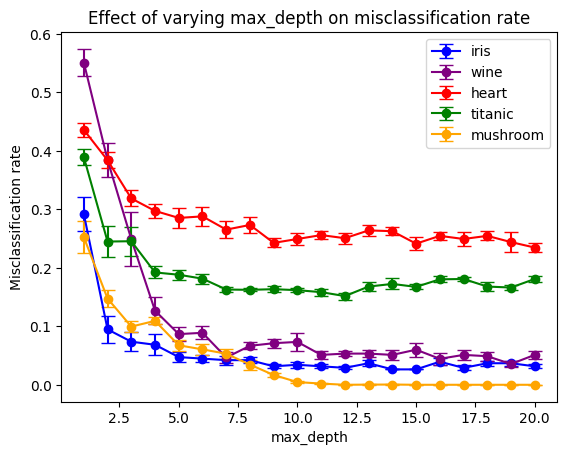

In [29]:
mean_sd = m_sd(results)
for dataset, m_sd in mean_sd.items():
    plt.errorbar(max_depths, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o-", c=cmap[dataset])
plt.xlabel("max_depth")
plt.ylabel("Misclassification rate")
plt.title("Effect of varying max_depth on misclassification rate")
plt.legend()

In [27]:
results

{'iris': array([[0.34210526, 0.05263158, 0.34210526, 0.34210526, 0.34210526,
         0.21052632, 0.26315789, 0.34210526, 0.34210526, 0.34210526],
        [0.        , 0.02631579, 0.05263158, 0.05263158, 0.10526316,
         0.15789474, 0.10526316, 0.02631579, 0.18421053, 0.23684211],
        [0.21052632, 0.07894737, 0.05263158, 0.05263158, 0.02631579,
         0.10526316, 0.07894737, 0.02631579, 0.02631579, 0.07894737],
        [0.15789474, 0.05263158, 0.02631579, 0.05263158, 0.02631579,
         0.02631579, 0.02631579, 0.10526316, 0.18421053, 0.02631579],
        [0.10526316, 0.05263158, 0.07894737, 0.02631579, 0.02631579,
         0.05263158, 0.05263158, 0.02631579, 0.02631579, 0.02631579],
        [0.05263158, 0.02631579, 0.02631579, 0.05263158, 0.02631579,
         0.05263158, 0.07894737, 0.02631579, 0.07894737, 0.02631579],
        [0.02631579, 0.02631579, 0.05263158, 0.02631579, 0.05263158,
         0.02631579, 0.02631579, 0.10526316, 0.02631579, 0.05263158],
        [0.02631579